In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

/home/not/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/not/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/not/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/not/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarnin

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_image, train_labels),(test_image, test_labels) = fashion_mnist.load_data()

In [3]:
print("Data train : "+str(len(train_image)))
print("Data train labels : "+str(len(train_labels)))
print("Data test : "+str(len(test_image)))
print("Data test labels : "+str(len(train_labels)))

Data train : 60000
Data train labels : 60000
Data test : 10000
Data test labels : 60000


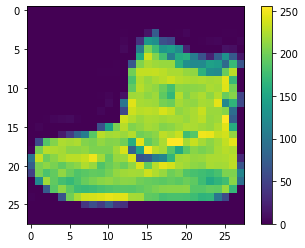

In [4]:
plt.imshow(train_image[0])
plt.colorbar()

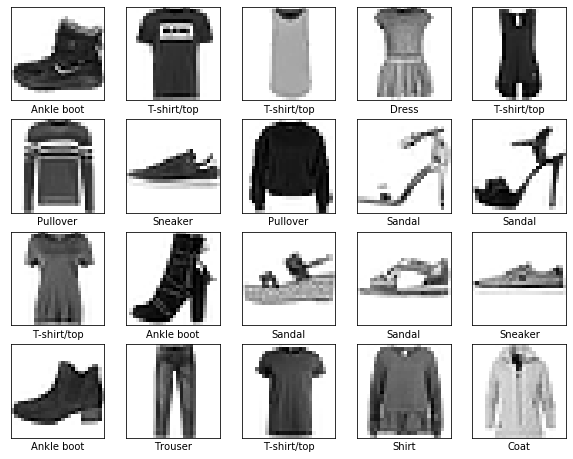

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_image[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [6]:
train_images = train_image / 255.0
test_images = test_image / 255.0

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [10]:
model.fit(train_image,train_labels, epochs=15)

Epoch 1/15
60000/60000 [==============================] - 12s 205us/sample - loss: 3.4503 - acc: 0.6949
Epoch 2/15
60000/60000 [==============================] - 16s 264us/sample - loss: 0.6501 - acc: 0.7692
Epoch 3/15
60000/60000 [==============================] - 16s 263us/sample - loss: 0.5831 - acc: 0.7920
Epoch 4/15
60000/60000 [==============================] - 18s 292us/sample - loss: 0.5321 - acc: 0.8141
Epoch 5/15
60000/60000 [==============================] - 20s 325us/sample - loss: 0.5063 - acc: 0.8229
Epoch 6/15
60000/60000 [==============================] - 18s 292us/sample - loss: 0.4850 - acc: 0.8299
Epoch 7/15
60000/60000 [==============================] - 15s 244us/sample - loss: 0.4810 - acc: 0.8328
Epoch 8/15
60000/60000 [==============================] - 11s 187us/sample - loss: 0.4732 - acc: 0.8373
Epoch 9/15
60000/60000 [==============================] - 14s 238us/sample - loss: 0.4739 - acc: 0.8378
Epoch 10/15
60000/60000 [==============================] - 11s 1

In [11]:
model.evaluate(test_image, test_labels, verbose=2)

10000/10000 - 1s - loss: 0.7121 - acc: 0.7992


[0.7121296372652054, 0.7992]

In [12]:
predictions = model.predict(test_image)

In [13]:
predictions[0]

array([0.0000000e+00, 6.9103268e-34, 0.0000000e+00, 1.3783836e-32,
       0.0000000e+00, 1.5943416e-03, 0.0000000e+00, 1.2880183e-03,
       1.9966011e-36, 9.9711764e-01], dtype=float32)

In [14]:
np.argmax(predictions[0])

9

Text(0.5, 0, 'Ankle boot')

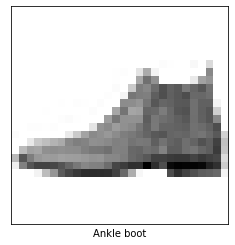

In [15]:
plt.imshow(test_image[0], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.xlabel(class_names[np.argmax(predictions[0])])

<BarContainer object of 10 artists>

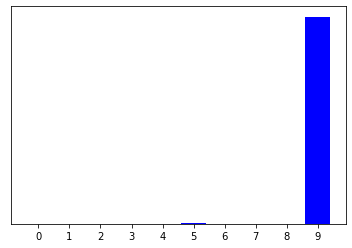

In [16]:
plt.xticks(range(10))
plt.yticks([])
plt.bar(range(10),predictions[0],color="blue")

Text(0.5, 0, 'Shirt')

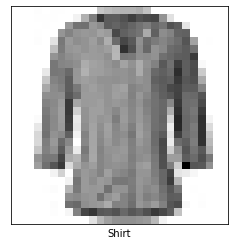

In [17]:
plt.imshow(test_image[4], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.xlabel(class_names[np.argmax(predictions[4])])

<BarContainer object of 10 artists>

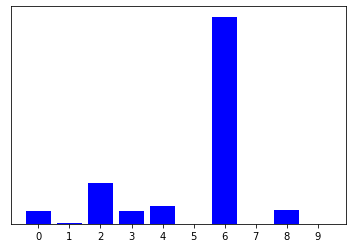

In [18]:
plt.xticks(range(10))
plt.yticks([])
plt.bar(range(10),predictions[4],color="blue")

<BarContainer object of 10 artists>

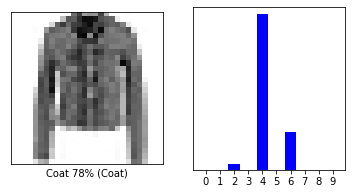

In [26]:
plt.figure(figsize=(6,3))

plt.subplot(1,2,1)
plt.imshow(test_image[10], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.xlabel("{} {:2.0f}% ({})".format(class_names[np.argmax(predictions[10])],
                                100*np.max(predictions[10]),
                                class_names[test_labels[10]]))

plt.subplot(1,2,2)
plt.xticks(range(10))
plt.yticks([])
plt.bar(range(10),predictions[10],color="blue")